In [1]:
import streamlit as st
import pandas as pd
from mplsoccer import VerticalPitch,Pitch, Sbopen
import json
import matplotlib as mpl

In [37]:
####### Competition_id 55 and season_id = 282 is for tournament UEFA Euro

In [2]:
from mplsoccer import Sbopen
parser = Sbopen(dataframe=True)
competition = parser.competition()

In [4]:
print(competition[competition['competition_id'] == 55])

    competition_id  season_id country_name competition_name  \
68              55        282       Europe        UEFA Euro   
69              55         43       Europe        UEFA Euro   

   competition_gender  competition_youth  competition_international  \
68               male              False                       True   
69               male              False                       True   

   season_name               match_updated           match_updated_360  \
68        2024  2024-07-15T15:48:50.315500  2024-07-15T15:52:24.778809   
69        2020  2024-04-16T12:44:40.558402  2024-04-16T12:47:18.505110   

           match_available_360             match_available  
68  2024-07-15T15:52:24.778809  2024-07-15T15:48:50.315500  
69  2024-04-16T12:47:18.505110  2024-04-16T12:44:40.558402  


In [14]:
sb = Sbopen()
competitions = sb.competition()
#print(competitions)

In [15]:
### Ids for EURO 2024 mens
competition_id = 55 
season_id = 282 

In [16]:
matches = sb.match(competition_id = competition_id,season_id = season_id)

In [43]:
df_lineup = sb.lineup(7478)
df_lineup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_id        36 non-null     int64 
 1   player_name      36 non-null     object
 2   player_nickname  36 non-null     object
 3   jersey_number    36 non-null     int64 
 4   match_id         36 non-null     int64 
 5   team_id          36 non-null     int64 
 6   team_name        36 non-null     object
 7   country_id       36 non-null     int64 
 8   country_name     36 non-null     object
dtypes: int64(5), object(4)
memory usage: 2.7+ KB


In [17]:
all_events = []
for match_id in matches['match_id']:
    df_events,df_related, df_freeze, df_tactics = sb.event(match_id)
    df_events['match_id'] = match_id
    all_events.append(df_events)

In [ ]:
all_lineups=[]
for match_id in matches['match_id']:
    df_lineup = sb.lineup(match_id)
    all_lineups.append(df_lineup)

lineups_df = pd.concat(all_lineups,ignore_index= True)
# lineups_df.head(11)

,player_id,player_name,player_nickname,jersey_number,match_id,team_id,team_name,country_id,country_name
0,2988,Memphis Depay,Memphis Depay,10,3942819,941,Netherlands,160,Netherlands
1,3306,Nathan Aké,Nathan Aké,5,3942819,941,Netherlands,160,Netherlands
2,3311,Daley Blind,Daley Blind,17,3942819,941,Netherlands,160,Netherlands
3,3567,Georginio Wijnaldum,Georginio Wijnaldum,8,3942819,941,Netherlands,160,Netherlands
4,3669,Virgil van Dijk,Virgil van Dijk,4,3942819,941,Netherlands,160,Netherlands
5,7787,Stefan de Vrij,Stefan de Vrij,6,3942819,941,Netherlands,160,Netherlands
6,7829,Wout Weghorst,Wout Weghorst,9,3942819,941,Netherlands,160,Netherlands
7,8069,Matthijs de Ligt,Matthijs de Ligt,3,3942819,941,Netherlands,160,Netherlands
8,8125,Denzel Dumfries,Denzel Dumfries,22,3942819,941,Netherlands,160,Netherlands
9,8259,Steven Bergwijn,Steven Bergwijn,25,3942819,941,Netherlands,160,Netherlands


In [7]:
lp =lineups_df[['player_id','player_name']]
lp.head()

,player_id,player_name
0,2988,Memphis Depay
1,3306,Nathan Aké
2,3311,Daley Blind
3,3567,Georginio Wijnaldum
4,3669,Virgil van Dijk


In [47]:
df_all_events = pd.concat(all_events,ignore_index= True)
df_all_events.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,ball_recovery_recovery_failure,block_offensive,foul_committed_offensive,shot_open_goal,dribble_no_touch,ball_recovery_offensive,pass_miscommunication,player_off_permanent,shot_follows_dribble,shot_redirect
0,d7c4f4a8-77b9-40c5-8d81-f50b40355723,1,1,00:00:00,0,0,1,0.000000,3942819,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e518d7a6-3360-4d94-aeef-661709bddf42,2,1,00:00:00,0,0,1,0.000000,3942819,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fb2e0f15-aa3c-4a06-a11b-f16ae5804342,3,1,00:00:00,0,0,1,0.000000,3942819,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75fd7777-ef15-4fdc-abb1-1349fef334c1,4,1,00:00:00,0,0,1,0.000000,3942819,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25dfc952-7a85-464f-b884-982064d46cc9,5,1,00:00:00.355000,0,0,2,2.455156,3942819,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
cols = df_all_events.columns
print(cols)

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'match_id', 'type_id', 'type_name', 'possession_team_id',
       'possession_team_name', 'play_pattern_id', 'play_pattern_name',
       'team_id', 'team_name', 'tactics_formation', 'player_id', 'player_name',
       'position_id', 'position_name', 'pass_recipient_id',
       'pass_recipient_name', 'pass_length', 'pass_angle', 'pass_height_id',
       'pass_height_name', 'end_x', 'end_y', 'body_part_id', 'body_part_name',
       'sub_type_id', 'sub_type_name', 'x', 'y', 'under_pressure',
       'outcome_id', 'outcome_name', 'counterpress', 'off_camera',
       'foul_committed_advantage', 'foul_won_advantage', 'technique_id',
       'technique_name', 'shot_statsbomb_xg', 'end_z',
       'goalkeeper_position_id', 'goalkeeper_position_name', 'aerial_won',
       'pass_cross', 'out', 'pass_assisted_shot_id', 'pass_shot_assist',
       'shot_key_pass_id', 'foul_committed_penalty', 'foul_committe

In [13]:
starting_xi_event = df_all_events.loc[((df_all_events['type_name'] == 'Starting XI') & (df_all_events['team_name'] == 'Scotland')),['id','tactics_formation']]
## joining on the team name and formation to the lineup
starting_xi = df_tactics.merge(starting_xi_event, on='id')
#filter only successful ball receipts from starting XI
event = df_all_events.loc[((df_all_events['type_name'] == 'Ball Receipt') & (df_all_events['outcome_name'].isnull()) & (df_all_events['player_id'].isin(starting_xi['player_id']))),['player_id','x','y']]
### merge on the starting positions to the events
event = event.merge(starting_xi,on='player_id')
formation = event['tactics_formation'].iloc[0]

NameError: name 'df_all_events' is not defined

In [9]:
import matplotlib.pyplot as plt  # Ensure you import this
%matplotlib inline
import matplotlib.image as mpimg

In [ ]:
flag_img = mpimg.imread('flags/Scotland.png')
flag_images = [flag_img] * len(starting_xi)
pitch = VerticalPitch(goal_type='box')
fig, ax = pitch.draw(figsize=(6, 8.72))
ax_text = pitch.formation(formation, positions=starting_xi.position_id, kind='text',
                          text=starting_xi.player_name.str.replace(' ', '\n'),
                          va='center', ha='center', fontsize=16, ax=ax)

ax_scatter = pitch.formation(formation, positions=starting_xi.position_id, kind='image',
                             image=flag_images,height = 5,ax= ax,xoffset = -8)
                             

ax_scatter = pitch.formation(formation, positions=starting_xi.position_id, kind='scatter',
                             height = 3,ax= ax,xoffset = -4)
                             

NameError: name 'starting_xi' is not defined

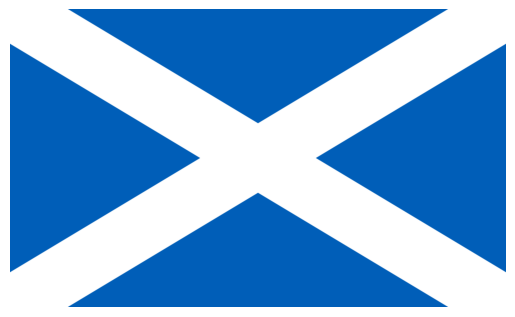

In [20]:
# Import the required libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read the image
flag_img = mpimg.imread('flags/Scotland.png')

# Display the image
plt.imshow(flag_img)
plt.axis('off')  # Optional: Turn off axis
plt.show() 

In [52]:
df_all_events.team_name.unique()

array(['Netherlands', 'England', 'Spain', 'France', 'Turkey', 'Portugal',
       'Austria', 'Denmark', 'Switzerland', 'Germany', 'Ukraine',
       'Belgium', 'Czech Republic', 'Romania', 'Slovenia', 'Georgia',
       'Slovakia', 'Serbia', 'Albania', 'Italy', 'Scotland', 'Hungary',
       'Croatia', 'Poland'], dtype=object)

In [1]:
df_tactics.head(11)

NameError: name 'df_tactics' is not defined

In [57]:
def most_goals(df, team_name):
    team_data= df[df['team_name'] == team_name]

    if team_data.empty:
        return {"message": f"No data available for team: {team_name}"}
    
    df_goals = team_data.groupby('player_name')['outcome_name'].apply(lambda x: (x=='Goal').sum()).reset_index(name='Goals_scored')
    highest_scorer = df_goals.loc[df_goals["Goals_scored"].idxmax()]

    return {"team": team_name,"player":highest_scorer['player_name'], "goals_scored": highest_scorer['Goals_scored']}

In [58]:
result = most_goals(df_all_events, "Turkey")
print(result)

{'team': 'Turkey', 'player': 'Merih Demiral', 'goals_scored': 2}


In [60]:
def most_fouls(df, team_name):
   
    # Filter data for the given team
    team_data = df[df['team_name'] == team_name]

    if team_data.empty:
        return {"message": f"No data available for team: {team_name}"}

    
    # If no red cards, compute fouls committed per player
    df_fouls = (team_data.groupby("player_name")["type_name"].apply(lambda x: (x == "Foul Committed").sum()).reset_index(name="Foul_committed"))

    # Get player with most fouls
    top_foul_player = df_fouls.loc[df_fouls["Foul_committed"].idxmax()]

    return {
        "team": team_name,
        "player": None,
        "red_cards": 0,
        "foul_player": top_foul_player["player_name"],
        "fouls_committed": int(top_foul_player["Foul_committed"]),
    }

# Example usage
result = most_fouls(df_all_events, "Turkey")
print(result)


{'team': 'Turkey', 'player': None, 'red_cards': 0, 'foul_player': 'Hakan Çalhanoğlu', 'fouls_committed': 7}


In [ ]:
#df_all_events.to_csv('euro_2024_events.csv')

In [61]:
sb = Sbopen()
competitions = sb.competition()
def get_tournament_data(competition_id,season_id):
    matches = sb.match(competition_id = competition_id,season_id = season_id)
    all_events = []
    for match_id in matches['match_id']:
        df_events,df_related, df_freeze, df_tactics = sb.event(match_id)
        df_events['match_id'] = match_id
        all_events.append(df_events)

    df_all_events = pd.concat(all_events,ignore_index= True)

    return df_all_events

In [62]:
df = get_tournament_data(55,282)
df.head(5)

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,ball_recovery_recovery_failure,block_offensive,foul_committed_offensive,shot_open_goal,dribble_no_touch,ball_recovery_offensive,pass_miscommunication,player_off_permanent,shot_follows_dribble,shot_redirect
0,d7c4f4a8-77b9-40c5-8d81-f50b40355723,1,1,00:00:00,0,0,1,0.000000,3942819,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e518d7a6-3360-4d94-aeef-661709bddf42,2,1,00:00:00,0,0,1,0.000000,3942819,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fb2e0f15-aa3c-4a06-a11b-f16ae5804342,3,1,00:00:00,0,0,1,0.000000,3942819,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75fd7777-ef15-4fdc-abb1-1349fef334c1,4,1,00:00:00,0,0,1,0.000000,3942819,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25dfc952-7a85-464f-b884-982064d46cc9,5,1,00:00:00.355000,0,0,2,2.455156,3942819,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
print(competitions)

    competition_id  season_id   country_name        competition_name  \
0                9        281        Germany           1. Bundesliga   
1                9         27        Germany           1. Bundesliga   
2             1267        107         Africa  African Cup of Nations   
3               16          4         Europe        Champions League   
4               16          1         Europe        Champions League   
..             ...        ...            ...                     ...   
69              55         43         Europe               UEFA Euro   
70              35         75         Europe      UEFA Europa League   
71              53        106         Europe       UEFA Women's Euro   
72              72        107  International       Women's World Cup   
73              72         30  International       Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      Fa

In [64]:
competitions.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882


In [ ]:
def most_assist(df, team_name):
    team_data= df[df['team_name'] == team_name]

    if team_data.empty:
        return {"message": f"No data available for team: {team_name}"}
    
    assists = team_data[(team_data['type_name'] == 'Pass') & (team_data['pass_goal_assist'] == True)]
    assists_cnt = assists['player_name'].value_counts()

    if assists_cnt.empty:
        return {"team": team_name,"player": None, "assists": 0}
    
    top_player = assists_cnt.idxmax()
    top_assists = assists_cnt.max()

    return {"team": team_name,"player": top_player, "Assists": top_assists}

In [21]:
team_logos={
    "Albania": "flags/Albania.png", "Austria": "flags/Austria.png", "Belgium": "flags/Belgium.png",
    "Croatia": "flags/Croatia.png", "Czech_Republic": "flags/Czech_Republic.png", "Denmark": "flags/Denmark.png",
    "England": "flags/England.png", "France": "flags/France.png", "Georgia": "flags/Georgia.png",
    "Germany": "flags/Germany.png", "Hungary": "flags/Hungary.png", "Italy": "flags/Italy.png",
    "Netherlands": "flags/Netherlands.png", "Poland": "flags/Poland.png", "Portugal": "flags/Portugal.png",
    "Romania": "flags/Romania.png", "Scotland": "flags/Scotland.png", "Serbia": "flags/Serbia.png",
    "Slovakia": "flags/Slovakia.png", "Slovenia": "flags/Slovenia.png","Spain": "flags/Spain.png",
    "Switzerland": "flags/Switzerland.png" ,"Turkey": "flags/Turkey.png","Ukraine": "flags/Ukraine.png"
}

team_logo = team_logos.get("Scotland",None)
team_logo

'flags/Scotland.png'